In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

import displayData as dd
import lrCostFunction as lCF
import oneVsAll as ova
import predictOneVsAll as pova
import scipy.optimize as opt

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 input images of Digits
num_labels = 10         # 10 labels, from 0 to 9
                        # Note that we have mapped "0" to label 10

In [3]:
# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...')

data = scio.loadmat('ex3data1.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

Loading and Visualizing Data ...


In [4]:
def display_data(x):
    (m, n) = x.shape

    # Set example_width automatically if not passed in
    example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)

    # Compute the number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                              pad + display_rows * (example_height + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(x[curr_ex]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          x[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display image
    plt.figure()
    plt.imshow(display_array, cmap='gray', extent=[-1, 1, -1, 1])
    plt.axis('off')


In [5]:
rand_indices = np.random.permutation(range(m))
selected = X[rand_indices[0:100], :]

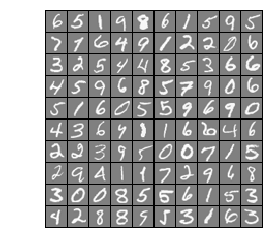

In [6]:
display_data(selected)

In [7]:
# ===================== Part 2-a: Vectorize Logistic Regression =====================
# In this part of the exercise, you will reuse your logistic regression
# code from the last exercise. Your task here is to make sure that your
# regularized logistic regression implementation is vectorized. After
# that, you will implement one-vs-all classification for the handwritten
# digit dataset
#

# Test case for lrCostFunction
print('Testing lrCostFunction()')

Testing lrCostFunction()


In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape((3, 5)).T/10]
y_t = np.array([1, 0, 1, 0, 1])
lmda_t = 3

In [9]:
# sigmoid function
sigmoid_func = lambda x: 1 / (1 + np.exp(-x))
# sigmoid_func = lambda x: np.exp(x) / (np.exp(x)+1)

In [10]:
# hypothesis function 
h_func = lambda theta, X: sigmoid_func(theta @ X.transpose()) 

In [11]:
def lr_cost_function(theta, X, y, lmd):
    m = y.size

    # You need to return the following values correctly
    cost = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #

    cost = (-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m  + (theta[1:] @ theta[1:]) * lmd / (2*m) 
    for idx in range(theta.size):
        grad[idx] += ((h_func(theta, X) - y) @ X[:, idx]) / m + (0 if idx == 0 else lmd * theta[idx] / m)
    # =========================================================
    
    return cost, grad


In [12]:

cost, grad = lr_cost_function(theta_t, X_t, y_t, lmda_t)

np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
print('Cost: {:0.7f}'.format(cost))
print('Expected cost: 2.534819')
print('Gradients:\n{}'.format(grad))
print('Expected gradients:\n[ 0.146561 -0.548558 0.724722 1.398003]')


Cost: 2.5348194
Expected cost: 2.534819
Gradients:
[ 0.146561 -0.548558  0.724722  1.398003]
Expected gradients:
[ 0.146561 -0.548558 0.724722 1.398003]


In [13]:
def one_vs_all(X, y, num_labels, lmd):
    # Some useful variables
    (m, n) = X.shape

    # You need to return the following variables correctly
    all_theta = np.zeros((num_labels, n + 1))

    # Add ones to the X data 2D-array
    X = np.c_[np.ones(m), X]

    # Optimize
    def cost_func(t):
        return lr_cost_function(t, X, y_flag, lmd)[0]

    def grad_func(t):
        return lr_cost_function(t, X, y_flag, lmd)[1]

    for i in range(num_labels):
        print('Optimizing for handwritten number {}...'.format(i))
        # ===================== Your Code Here =====================
        # Instructions : You should complete the following code to train num_labels
        #                logistic regression classifiers with regularization
        #                parameter lambda
        #
        #
        # Hint: you can use y == c to obtain a vector of True(1)'s and False(0)'s that tell you
        #       whether the ground truth is true/false for this class
        #
        # Note: For this assignment, we recommend using opt.fmin_cg to optimize the cost
        #       function. It is okay to use a for-loop (for c in range(num_labels) to
        #       loop over the different classes
        #
        y_flag = (y == (i+1)) * 1

        theta = all_theta[i]
        theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=theta, maxiter=400, full_output=True, disp=False)
        all_theta[i] = theta
        # ============================================================    
        print('Done')

    return all_theta


In [14]:
lmd = 0.1

In [15]:
# ===================== Part 2-b: One-vs-All Training =====================
print('Training One-vs-All Logistic Regression ...')

lmd = 0.1
all_theta = one_vs_all(X, y, num_labels, lmd)

Training One-vs-All Logistic Regression ...
Optimizing for handwritten number 0...
Done
Optimizing for handwritten number 1...
Done
Optimizing for handwritten number 2...
Done
Optimizing for handwritten number 3...
Done
Optimizing for handwritten number 4...
Done
Optimizing for handwritten number 5...
Done
Optimizing for handwritten number 6...
Done
Optimizing for handwritten number 7...
Done
Optimizing for handwritten number 8...
Done
Optimizing for handwritten number 9...
Done


In [16]:
def predict_one_vs_all(theta, X):
    m = X.shape[0]

    # Return the following variable correctly
    p = np.zeros(m)
    
    # Add ones to the X data 2D-array
    X = np.c_[np.ones(m), X]

    # ===================== Your Code Here =====================
    # Instructions : Complete the following code to make predictions using
    #                your learned logistic regression parameters.
    #                You should set p to a 1D-array of 0's and 1's
    #
    p = np.argmax((X @ all_theta.T), axis=1)+1
    
    # ===========================================================

    return p


In [17]:
# ===================== Part 3: Predict for One-Vs-All =====================

pred = predict_one_vs_all(all_theta, X)

print('Training set accuracy: {}'.format(np.mean(pred == y)*100))

print('ex3 Finished. Press ENTER to exit')


Training set accuracy: 96.48
ex3 Finished. Press ENTER to exit
